In [1]:
# Import libraries
import datetime as dt
import pandas_datareader as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

In [2]:
# Define timeframe 
start = dt.datetime (2019,1,1)
end = dt.datetime.now ()

In [3]:
# Load the data
ticker = "AAPL"
data = web.DataReader(ticker, "yahoo", start, end)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,39.840000,39.119999,39.632500,39.435001,140014000.0,38.338482
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.382229
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.559078
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.034378
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.954174


In [4]:
# Restructure data
data = data [["Open", "High", "Low", "Close"]]

In [5]:
# Change the date format to numerical for candlestick functions

# Currently date column is the index column -> Cannot manipulate 
# Reset the index column
data.reset_index (inplace = True)

# Map for date2num functions
data ["Date"] = data ["Date"].map (mdates.date2num)

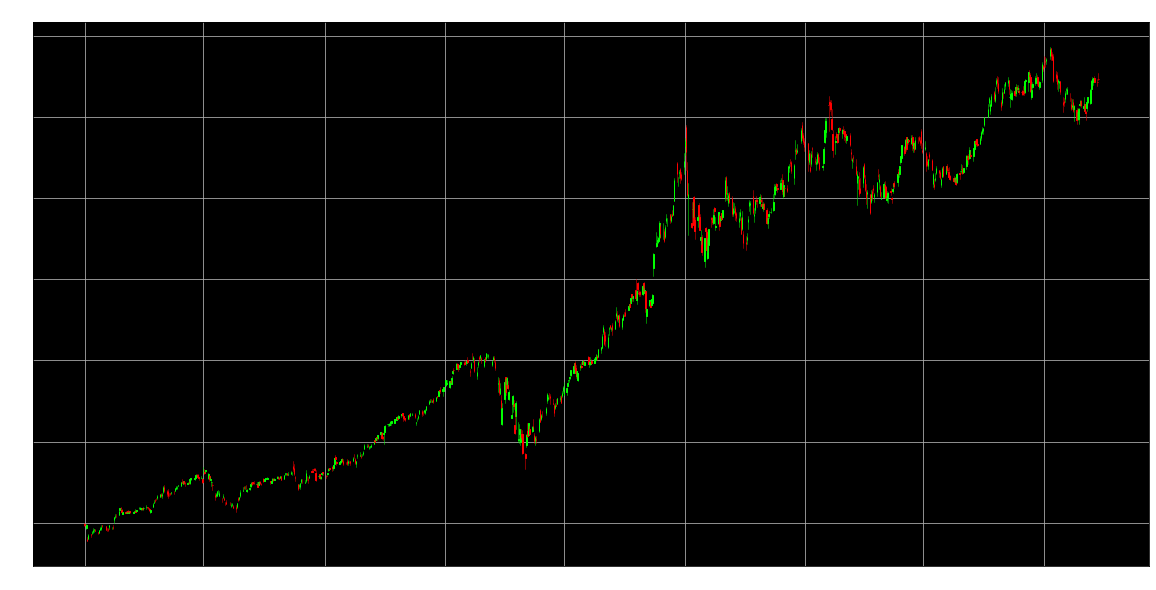

In [7]:
# Visualisation
ax = plt.subplot ()

# Resize
plt.rcParams["figure.figsize"] = (20,10)

# Show the grid
ax.grid (True)
# Grid behind the candlestick
ax.set_axisbelow (True)

# Set title
ax.set_title ("{} Share Price".format(ticker), color = "white")

# Set background colour 
ax.set_facecolor ("black")
#Set the label as white colour
ax.tick_params (axis = "x", colors = "white")
ax.tick_params (axis = "y", colors = "white")

# Plot the date under date format
ax.xaxis_date()

candlestick_ohlc (ax, data.values, width = 0.5, colorup = "#00ff00") #green colour
plt.show()
